In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits

<h1>FLCT and synthetised data</h1>

In [2]:
cube1 = fits.open("0_lwsynth_525.0.fits")[0].data

In [3]:
cube1.shape

(768, 768, 1, 81)

In [4]:
cube2d = fits.open("150_lwsynth_525.0.fits")[1].data

In [5]:
cube2d.shape

(81,)

In [6]:
cube2 = fits.open("150_lwsynth_525.0.fits")[0].data

In [7]:
import pyflct

In [8]:
delta_t = 10.0 * 3
pixelsize = 16.0
sigma = 1200.0 / 1.665 / pixelsize

In [9]:
image1 = cube1[:,:,0,0]
image2 = cube2[:,:,0,0]

In [10]:
vel_x, vel_y, vm = pyflct.flct(image1, image2, delta_t, pixelsize, sigma, quiet = True)

In [11]:
# Define function for temporal averaging
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end], axis = 0)
    return tmp_avg

In [12]:
print(vel_x)

[[0.22963358 0.22458826 0.23347745 ... 0.26312381 0.26679388 0.26991887]
 [0.229264   0.2239426  0.23260547 ... 0.26470441 0.26838419 0.27152285]
 [0.22874881 0.22306078 0.23149753 ... 0.26628165 0.269968   0.27311721]
 ...
 [0.63288352 0.63176839 0.63015518 ... 0.22298617 0.22464195 0.22602606]
 [0.6313598  0.63030328 0.62874452 ... 0.22297138 0.22463842 0.22603263]
 [0.62982594 0.62882892 0.62732564 ... 0.22297544 0.22465477 0.22606002]]


In [13]:
# After that, we shall load velocities taken directly from simulation
Vx = fits.open("Velocities.fits")[1].data # Vy from Velocities.fits as originally thought
Vy = fits.open("Velocities.fits")[0].data # Vx from Velocities.fits as originally thought
Vx = Vx.transpose(0, 2, 1)
Vy = Vy.transpose(0, 2, 1)

In [14]:
# 2x2 Binning of Velocities
Vx_1 = Vx[0]
Vx_2 = Vx[1]

Vy_1 = Vy[0]
Vy_2 = Vy[1]

Vx_1 = Vx_1.reshape(768, 2, 768, 2)
Vx_2 = Vx_2.reshape(768, 2, 768, 2)
Vy_1 = Vy_1.reshape(768, 2, 768, 2)
Vy_2 = Vy_2.reshape(768, 2, 768, 2)

In [15]:
Vx_bin = (Vx_1 + Vx_2).mean(axis = 3).mean(axis = 1)
Vy_bin = (Vy_1 + Vy_2).mean(axis = 3).mean(axis = 1)

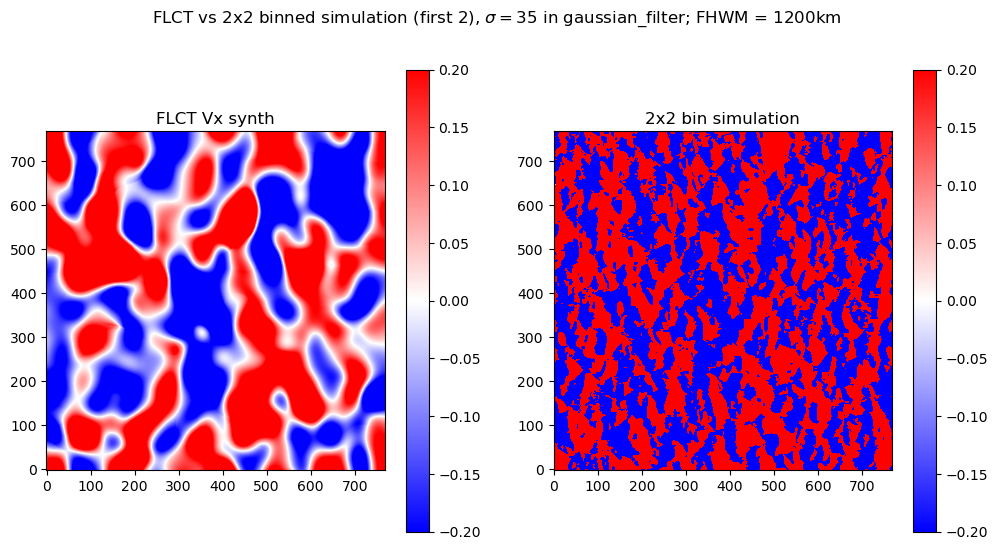

In [16]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_bin[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("2x2 bin simulation") 
fig.colorbar(im2)

In [17]:
from scipy.ndimage import gaussian_filter


In [18]:
# sigma = 35
Vx_filtered35 = gaussian_filter(Vx_bin, 35, mode = "wrap")
Vy_filtered35 = gaussian_filter(Vy_bin, 35, mode = "wrap")

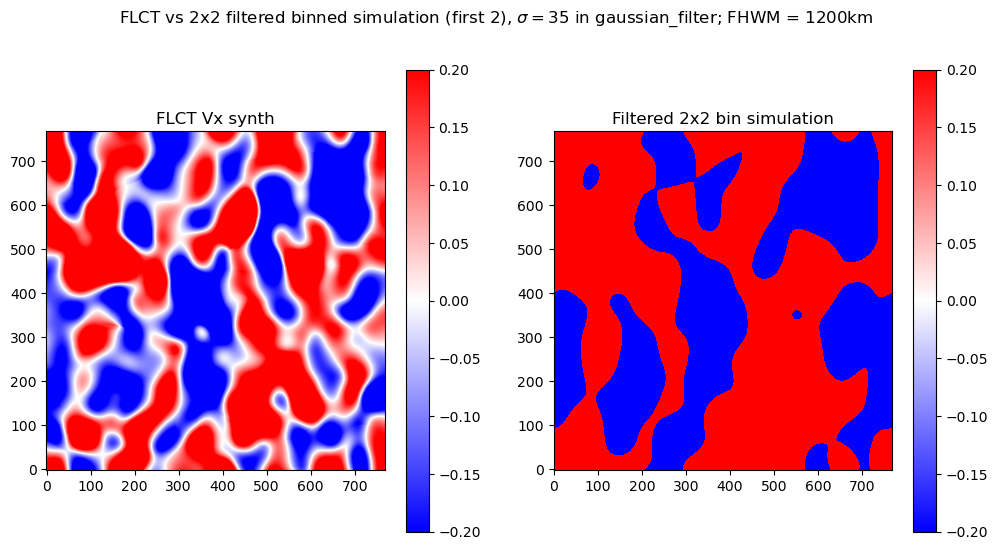

In [19]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 filtered binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered35[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("Filtered 2x2 bin simulation") 
fig.colorbar(im2)
plt.savefig("Synth_FLCT_vs_sim_Vx.png", dpi = 600)

In [20]:
from scipy.stats import pearsonr

In [21]:
r_x = pearsonr(vel_x.flatten(), Vx_filtered35.flatten()) 
print(r_x)

PearsonRResult(statistic=0.7357752687728261, pvalue=0.0)


In [22]:
r_y = pearsonr(vel_y.flatten(), Vy_filtered35.flatten())
print(r_y)

PearsonRResult(statistic=0.6540577409416082, pvalue=0.0)


<h2>Different wavelength</h2>

In [23]:
image3 = cube1[:,:,0,25]
image4 = cube2[:,:,0,25]

In [24]:
vel_xla, vel_yla, vmla = pyflct.flct(image3, image4, delta_t, pixelsize, sigma, quiet = True)

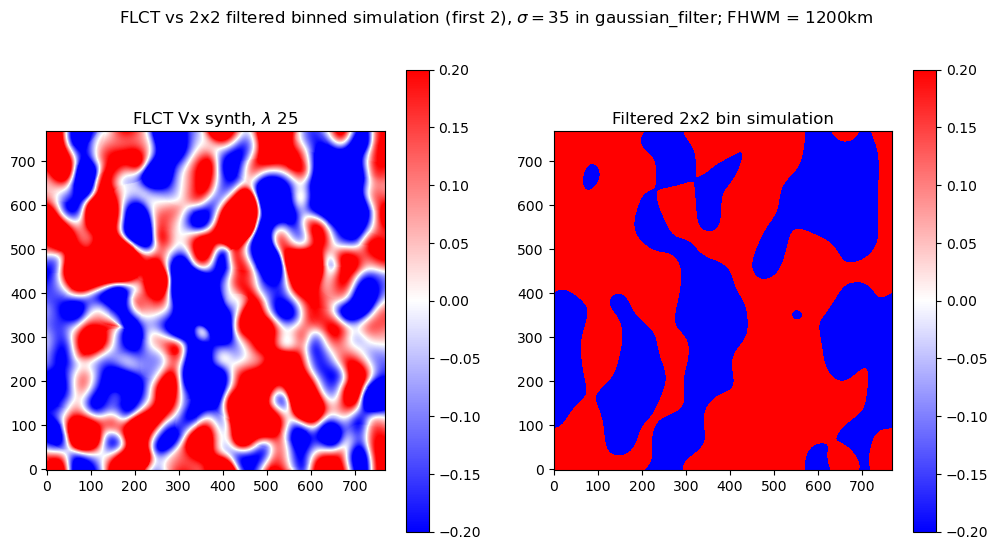

In [25]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 filtered binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_xla[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth, $\lambda$ 25") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered35[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("Filtered 2x2 bin simulation") 
fig.colorbar(im2)
plt.savefig("Synth_FLCT_vs_sim_Vxla25.png", dpi = 600)

In [26]:
print(vel_xla)

[[0.22214823 0.23092028 0.23958615 ... 0.28801841 0.29157304 0.29458372]
 [0.22114321 0.22968329 0.23812112 ... 0.28894074 0.29250731 0.2955336 ]
 [0.2323362  0.22820188 0.23641144 ... 0.28986422 0.29343973 0.29647867]
 ...
 [0.63432719 0.63323109 0.63163441 ... 0.2149569  0.21645521 0.2176946 ]
 [0.63290217 0.63186393 0.63032085 ... 0.21494341 0.2164556  0.21770765]
 [0.63146403 0.63048444 0.62899588 ... 0.21495672 0.21648349 0.21774884]]


In [27]:
image5 = cube1[:,:,0,80]
image6 = cube2[:,:,0,80]

In [28]:
vel_xla80, vel_yla80, vmla80 = pyflct.flct(image5, image6, delta_t, pixelsize, sigma, quiet = True)

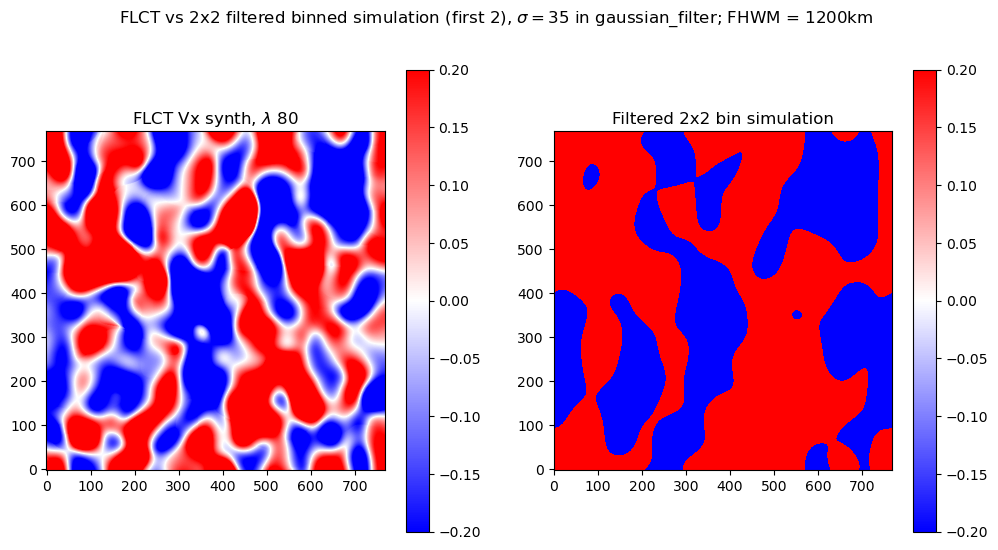

In [29]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 filtered binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_xla80[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth, $\lambda$ 80") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered35[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("Filtered 2x2 bin simulation") 
fig.colorbar(im2)
plt.savefig("Synth_FLCT_vs_sim_Vxla80.png", dpi = 600)

In [30]:
r_x25 = pearsonr(vel_xla.flatten(), Vx_filtered35.flatten()) 
print(r_x25)

PearsonRResult(statistic=0.7320450700492762, pvalue=0.0)


In [31]:
r_x80 = pearsonr(vel_xla80.flatten(), Vx_filtered35.flatten()) 
print(r_x80)

PearsonRResult(statistic=0.7352218186092379, pvalue=0.0)


<p>There is no apparent major difference between different $\lambda$...</p>

In [38]:
image7 = cube1[:,:,0,45]
image8 = cube2[:,:,0,45]

In [39]:
vel_xla45, vel_yla45, vmla45 = pyflct.flct(image7, image8, delta_t, pixelsize, sigma, quiet = True)

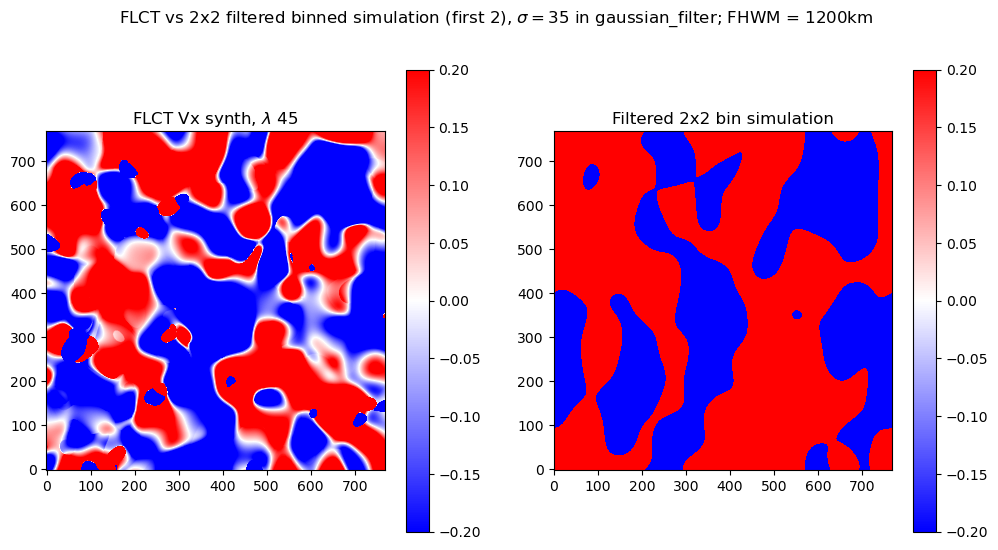

In [40]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 filtered binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_xla45[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth, $\lambda$ 45") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered35[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("Filtered 2x2 bin simulation") 
fig.colorbar(im2)
plt.savefig("Synth_FLCT_vs_sim_Vxla45.png", dpi = 600)

In [41]:
r_x45 = pearsonr(vel_xla45.flatten(), Vx_filtered35.flatten()) 
print(r_x45)

PearsonRResult(statistic=0.0746083636807017, pvalue=0.0)


In [48]:
image9 = cube1[:,:,0,50]
image10 = cube2[:,:,0,50]

In [49]:
vel_xla50, vel_yla50, vmla50 = pyflct.flct(image9, image10, delta_t, pixelsize, sigma, quiet = True)

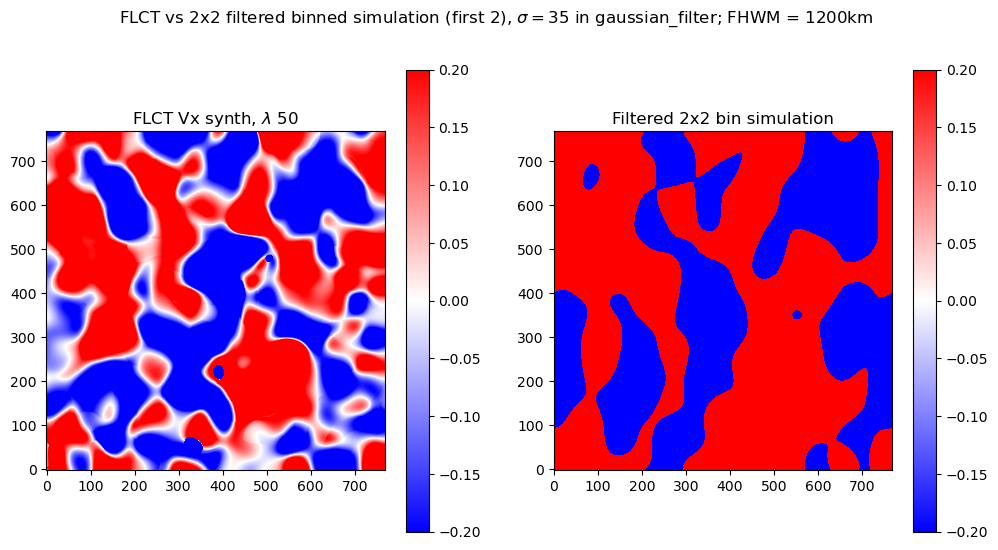

In [50]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 filtered binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_xla50[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth, $\lambda$ 50") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered35[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("Filtered 2x2 bin simulation") 
fig.colorbar(im2)
plt.savefig("Synth_FLCT_vs_sim_Vxla50.png", dpi = 600)

In [51]:
r_x50 = pearsonr(vel_xla50.flatten(), Vx_filtered35.flatten()) 
print(r_x50)

PearsonRResult(statistic=0.2827375309295368, pvalue=0.0)


In [52]:
image11 = cube1[:,:,0,60]
image12 = cube2[:,:,0,60]

In [53]:
vel_xla60, vel_yla60, vmla60 = pyflct.flct(image11, image12, delta_t, pixelsize, sigma, quiet = True)

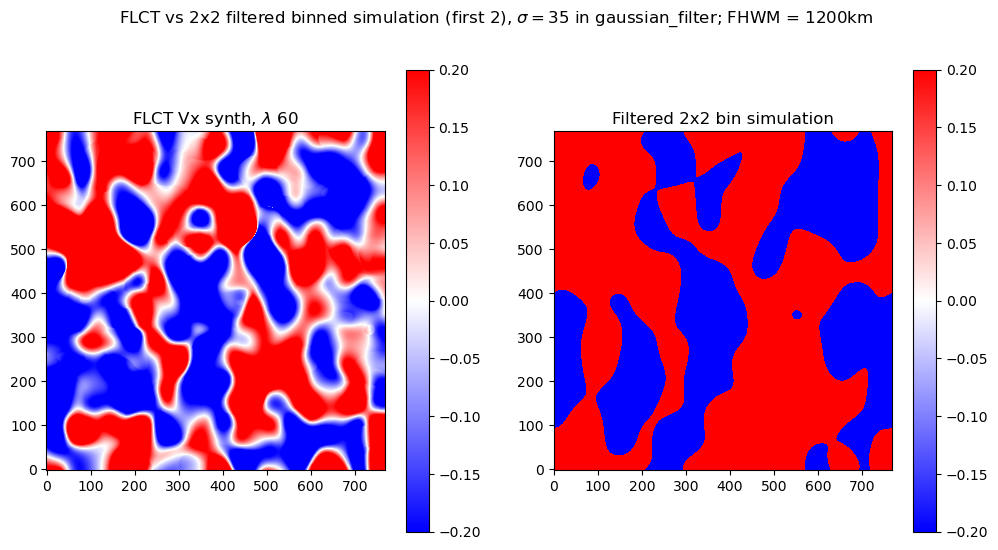

In [54]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 filtered binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_xla60[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth, $\lambda$ 60") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered35[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("Filtered 2x2 bin simulation") 
fig.colorbar(im2)
plt.savefig("Synth_FLCT_vs_sim_Vxla60.png", dpi = 600)

In [55]:
r_x60 = pearsonr(vel_xla60.flatten(), Vx_filtered35.flatten()) 
print(r_x60)

PearsonRResult(statistic=0.640239787241244, pvalue=0.0)
